In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "hamspam.csv"
df = pd.read_csv(r"C:\Users\shara\OneDrive\Desktop\Spring 2025\IS 733\hamspam.csv.csv")

# Display basic info
print(df.info())

# Show first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    1000 non-null   int64 
 1   Contains Link         1000 non-null   object
 2   Contains Money Words  1000 non-null   object
 3   Length                1000 non-null   object
 4   Class                 1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None
   ID Contains Link Contains Money Words Length Class
0   1           Yes                  Yes   Long  Spam
1   2            No                   No   Long  Spam
2   3           Yes                   No   Long   Ham
3   4            No                  Yes  Short   Ham
4   5           Yes                   No   Long   Ham


In [35]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoder = LabelEncoder()
for col in ['Contains Link', 'Contains Money Words', 'Length', 'Class']:
    df[col] = encoder.fit_transform(df[col])

# Display first few rows after encoding
print(df.head())


   ID  Contains Link  Contains Money Words  Length  Class
0   1              1                     1       0      1
1   2              0                     0       0      1
2   3              1                     0       0      0
3   4              0                     1       1      0
4   5              1                     0       0      0


In [37]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['Contains Link', 'Contains Money Words', 'Length']]
y = df['Class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dataset sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (800, 3)
Testing set size: (200, 3)


In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate model performance
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.535
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.83      0.65       103
           1       0.55      0.23      0.32        97

    accuracy                           0.54       200
   macro avg       0.54      0.53      0.48       200
weighted avg       0.54      0.54      0.49       200



In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate model performance
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.49
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.78      0.61       103
           1       0.44      0.19      0.26        97

    accuracy                           0.49       200
   macro avg       0.47      0.48      0.44       200
weighted avg       0.47      0.49      0.44       200



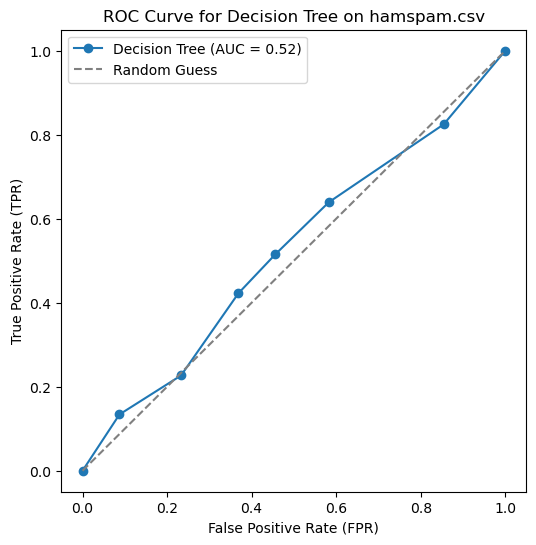

Decision Tree AUC Score: 0.52


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train Decision Tree classifier with reduced max_depth
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Get prediction probabilities
y_probs_dt = dt_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
auc_score_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve for the Decision Tree model
plt.figure(figsize=(6, 6))
plt.plot(fpr_dt, tpr_dt, marker='o', linestyle='-', label=f"Decision Tree (AUC = {auc_score_dt:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Decision Tree on hamspam.csv")
plt.legend()
plt.show()

# Print AUC score
print(f"Decision Tree AUC Score: {auc_score_dt:.2f}")


In [27]:
file_path = r"C:\Users\shara\OneDrive\Desktop\Spring 2025\IS 733\hamspam.csv"

try:
    with open(file_path, "r") as f:
        print("File found and successfully opened!")
except FileNotFoundError:
    print("File not found. Check the path again.")

File not found. Check the path again.
